## **Understanding Dataset**

This dataset provides information about data science job listings obtained from Glassdoor. Each entry includes job titles, company names, locations, estimated salary ranges, posting dates, company ratings, and direct links to job postings, offering a comprehensive overview of the current job market.

To effectively gain insights into the data science industry, this dataset can be explored in various ways, such as analyzing salary ranges, geographic distribution of job opportunities, and company preferences. Understanding these trends can provide valuable information about the dynamics of the data science job market.

## **Loading Data**

URL: https://www.kaggle.com/datasets/muhammadehsan000/data-science-job-market-and-salaries-2024/data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['Data-Science-Jobs'] = '/content/drive/MyDrive/Colab Notebooks/kaggle'

In [ ]:
!kaggle datasets download -d muhammadehsan000/data-science-job-market-and-salaries-2024

Dataset URL: https://www.kaggle.com/datasets/muhammadehsan000/data-science-job-market-and-salaries-2024
License(s): CC0-1.0
  0% 0.00/303k [00:00<?, ?B/s]
100% 303k/303k [00:00<00:00, 63.5MB/s]


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import zipfile

# Define the path to your zip file
file_path = '/content/data-science-job-market-and-salaries-2024.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/kaggle')  # Replace 'destination_folder' with your desired folder

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/Data-Science-Jobs.csv')

In [5]:
df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6


## **Cleaning dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        500 non-null    int64  
 1   Job Title       500 non-null    object 
 2   Company Name    500 non-null    object 
 3   Location        500 non-null    object 
 4   Salary          438 non-null    object 
 5   Date            500 non-null    object 
 6   Logo            436 non-null    object 
 7   Job Link        500 non-null    object 
 8   Company Rating  439 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [7]:
# Count the number of missing values in each column
df.isna().sum()

,0
Position,0
Job Title,0
Company Name,0
Location,0
Salary,62
Date,0
Logo,64
Job Link,0
Company Rating,61


In [8]:
# Find the five percent threshold
Threshold = len(df) * 0.5
# Create a filter
cols_to_drop = df.columns[df.isna().sum() <= Threshold]
# Drop missing values for columns below the threshold
df.dropna(subset= cols_to_drop, inplace= True)

print(df.isna().sum())

Position          0
Job Title         0
Company Name      0
Location          0
Salary            0
Date              0
Logo              0
Job Link          0
Company Rating    0
dtype: int64


In [9]:
df.isnull().sum()

,0
Position,0
Job Title,0
Company Name,0
Location,0
Salary,0
Date,0
Logo,0
Job Link,0
Company Rating,0


## **Exploratory Data Analysis (EDA)**

1. Trend Analysis

In [9]:
print(df.columns)

Index(['Position', 'Job Title', 'Company Name', 'Location', 'Salary', 'Date',
       'Logo', 'Job Link', 'Company Rating'],
      dtype='object')


1.1 Plot a bar chart to visualize the most job titles used in the market.

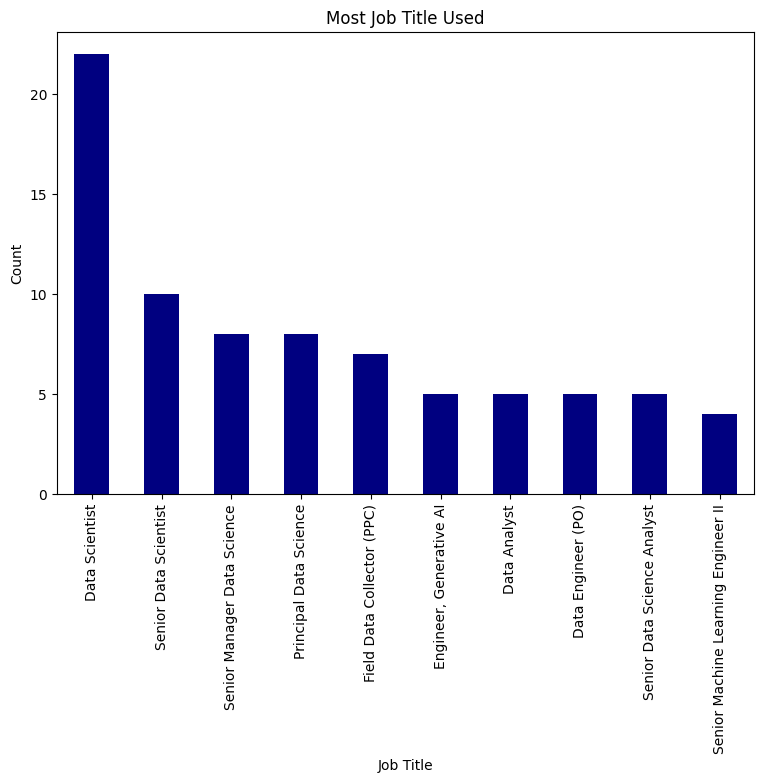

In [10]:
# Count the occurrences of each job title and choose only Top 10
job_count = df['Job Title'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(9, 6))
job_count.plot(kind= 'bar', color= 'navy')

# Customize the plot labels and title
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Most Job Title Used')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

The bar chart shows the most job title used trends:
* Data Scientist is the most frequently used job title, followed by Senior Data Scientist.
* Senior Manager Data Science and Principal Data Science are also prominent job titles, indicating the market needs for experienced data scientists in leadership roles.

1.2 Plot a chart to visualize the companies with the highest demand for data scientists in the market.

In [12]:
df['Company Name'] = df['Company Name'].str.replace(r'\n\d+\.\d+', '', regex=True)

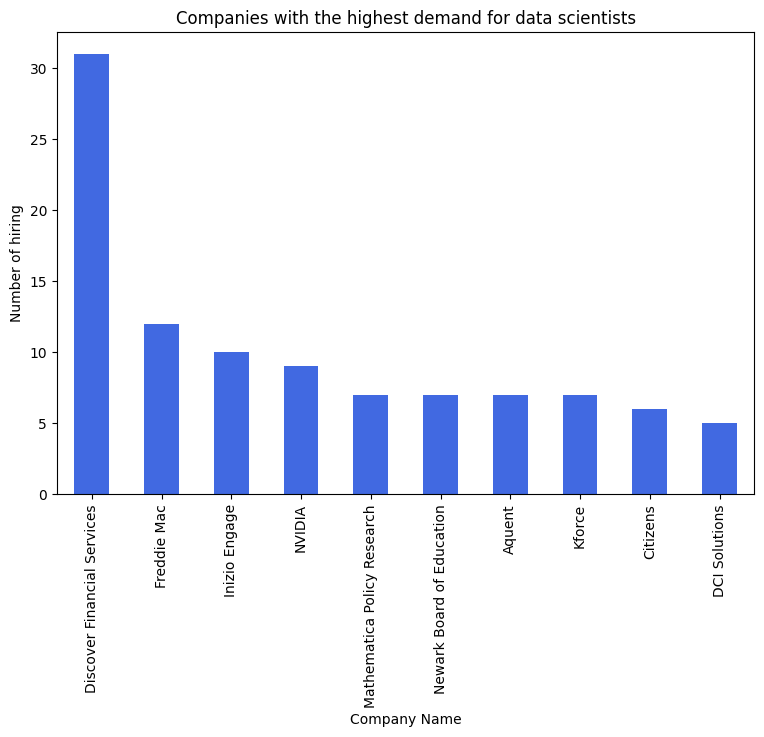

In [13]:
com_count = df['Company Name'].value_counts().head(10)

plt.figure(figsize = (9,6))
com_count.plot(kind= 'bar', color= 'royalblue')

plt.xlabel('Company Name')
plt.ylabel('Number of hiring')
plt.title('Companies with the highest demand for data scientists')

plt.xticks(rotation=90)

plt.show()

1.3 Plot a chart to visualize the top 10 location have the highest number of data science job openings

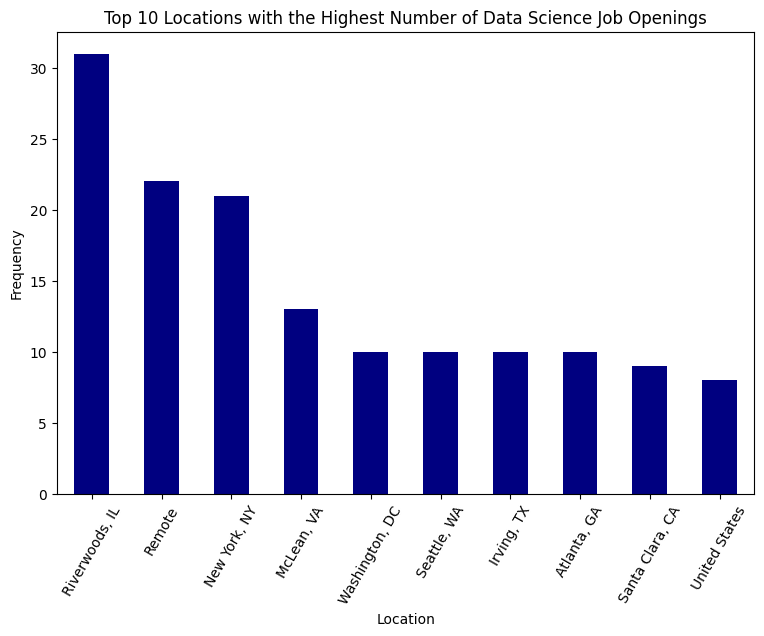

In [66]:
locate_count = df['Location'].value_counts().head(10)

plt.figure(figsize = (9, 6))
locate_count.plot(kind= 'bar', color= 'navy')

plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Top 10 Locations with the Highest Number of Data Science Job Openings')

plt.xticks(rotation=60)

plt.show()

The bar chart shows the top 10 locations with the highest number of data science job openings.
* Riverwoods, IL and New York, NY are the top locations for data science job openings, indicating a high concentration of hiring companies in the United States.
* Data Scientist prefer to work in Remote: "Remote" is the second most popular location, indicating a strong preference for remote work in the data science field.

1.4 Plot a chart to visualize the top 20 company rating of data science position.

In [71]:
top_20_rating = df.groupby('Company Name')['Company Rating'].max().sort_values(ascending=False).head(20)

top_20_rating

,Company Rating
Company Name,
Vital Edge Solutions,5.0
Penfield Search Partners,5.0
"Openwork, LLC",5.0
Blackstone Group,5.0
Emergent Software,4.8
cBEYONData,4.8
Streamline Defense,4.6
Noblis,4.6
NVIDIA,4.6


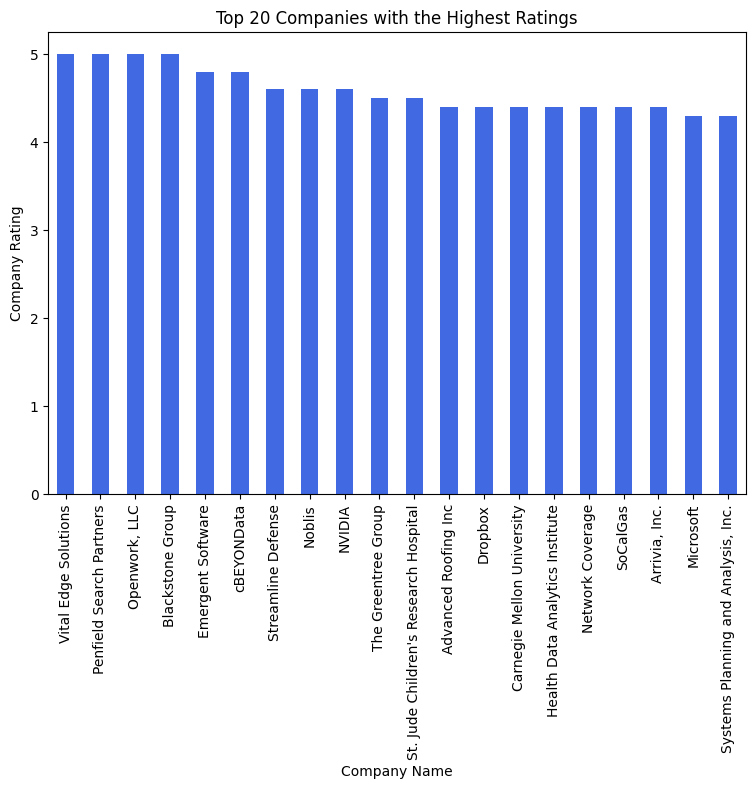

In [73]:
plt.figure(figsize=(9, 6))
top_20_rating.plot(x= "Company Name", kind= "bar", color= "royalblue")

plt.xlabel('Company Name')
plt.ylabel('Company Rating')
plt.title('Top 20 Companies with the Highest Ratings')
plt.xticks(rotation=90)

plt.show()

Insight form the chart
* Top performers: Four companies share the highest rating of 5.0:
    * Vital Edge Solutions
    * Penfield Search Partners
    * Openwork, LLC
    * Blackstone Group

* The ratings are relatively close, with a range of approximately 4.0 to 5.0.
* Industry diversity: The top-rated companies appear to come from various industries, including software (Emergent Software), data (BEYOND Data), and finance (Blackstone Group).
* Lesser-known names: Many of these companies are not household names, suggesting that smaller or specialized firms can achieve high ratings alongside larger corporations.

1.5 Plot a chart to visualize the trends of Data jobs posting

In [157]:
df['Date'].unique()

array(['30d+', '11d', '1d', '27d', '6d', '10d', '30d', '3d', '2d', '4d',
       '5d', '16d', '12d', '17d', '18d', '25d', '21d', '24d', '19d',
       '24h', '9d', '26d', '14d', '13d', '8d', '23d'], dtype=object)

In [10]:
import re

def convert_date(date_str):
    match = re.match(r'(\d+)d\+', date_str) # (\d+) is a capturing group that matches one or more digits. # d\+ matches the literal characters d+.
    match1 = re.match(r'(\d+)d', date_str) # d matches the literal characters d.
    match2 = re.match(r'(\d+)h', date_str) # h matches the literal characters h.
    if match:
        days_ago = int(match.group(1))
        return datetime.now() - timedelta(days=days_ago) # Use subtraction for timedelta
    elif match1:
        days_ago = int(match1.group(1))
        return datetime.now() - timedelta(days=days_ago)
    elif match2:
        hours_ago = int(match2.group(1))
        return datetime.now() - timedelta(hours=hours_ago)
    else: return None

In [11]:
from datetime import datetime, timedelta
# Make sure this line is indented at the same level as the 'def' statement
df['Posting Date'] = df['Date'].apply(convert_date)

In [12]:
# Extract year, month, and day
df['Year'] = df['Posting Date'].dt.year
df['Month'] = df['Posting Date'].dt.month
df['Day'] = df['Posting Date'].dt.day

# Combine to the new column
df['Date_new'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

df

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating,Posting Date,Year,Month,Day,Date_new
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7,2024-07-23 10:37:56.526456,2024,7,23,2024-07-23
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4,2024-07-23 10:37:56.526477,2024,7,23,2024-07-23
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2,2024-08-11 10:37:56.526485,2024,8,11,2024-08-11
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6,2024-08-21 10:37:56.526492,2024,8,21,2024-08-21
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6,2024-07-23 10:37:56.526499,2024,7,23,2024-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,491,Data Engineer,Inspur USA Inc.\n3.6,"Seattle, WA",$30.00 - $50.00 Per Hour (Employer est.),24h,https://media.glassdoor.com/sql/420877/inspur-...,https://www.glassdoor.com/partner/jobListing.h...,3.6,2024-08-21 10:37:56.528994,2024,8,21,2024-08-21
491,492,"Manager, Data Science Platform Engineering",Dave Inc.\n4.0,Remote,$169K - $271K (Employer est.),30d+,https://media.glassdoor.com/sql/1847431/dave-s...,https://www.glassdoor.com/partner/jobListing.h...,4.0,2024-07-23 10:37:56.528998,2024,7,23,2024-07-23
494,495,Analytics Solution Owner,Network Coverage\n4.4,Remote,$75K - $125K (Employer est.),30d+,https://media.glassdoor.com/sql/1839638/networ...,https://www.glassdoor.com/partner/jobListing.h...,4.4,2024-07-23 10:37:56.529002,2024,7,23,2024-07-23
497,498,Tchr of English- Newark School of Data Science...,Newark Board of Education\n3.3,"Newark, NJ",$62K - $107K (Employer est.),30d+,https://media.glassdoor.com/sql/137673/newark-...,https://www.glassdoor.com/partner/jobListing.h...,3.3,2024-07-23 10:37:56.529006,2024,7,23,2024-07-23


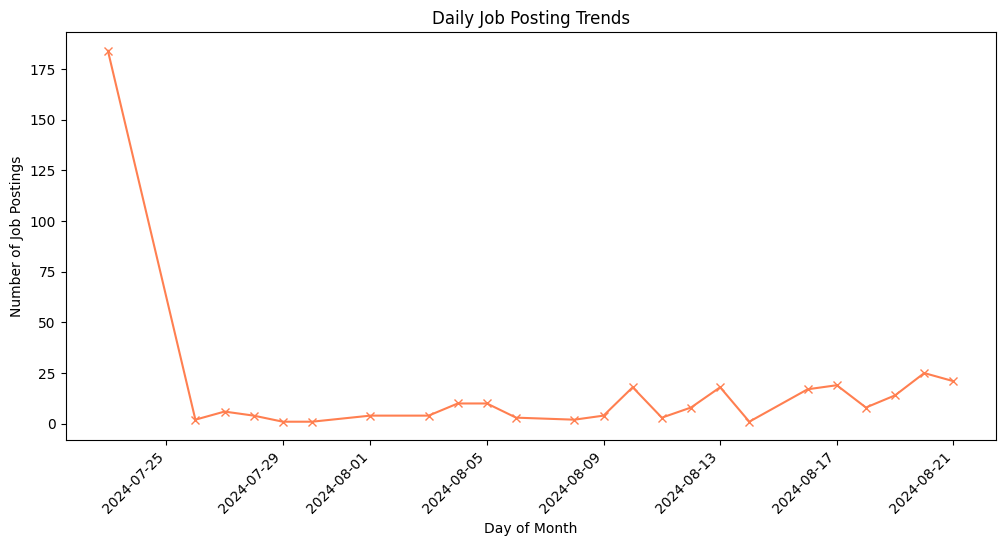

In [176]:
# Count daily postings and sort by date
daily_postings = df['Date_new'].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(12, 6))
daily_postings.plot(kind='line', marker='x', color='coral')

# Set labels and title
plt.title('Daily Job Posting Trends')
plt.xlabel('Day of Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)

plt.show()

This graph shows the daily job posting trends over time.

* There's a dramatic spike at the beginning of the graph, with nearly 180 job postings on July 25, 2024. However, this data point may not accurately reflect overall trends because it includes job postings from before July 25.

Therefore, I want to filter the data to only include dates from July 26 onwards.

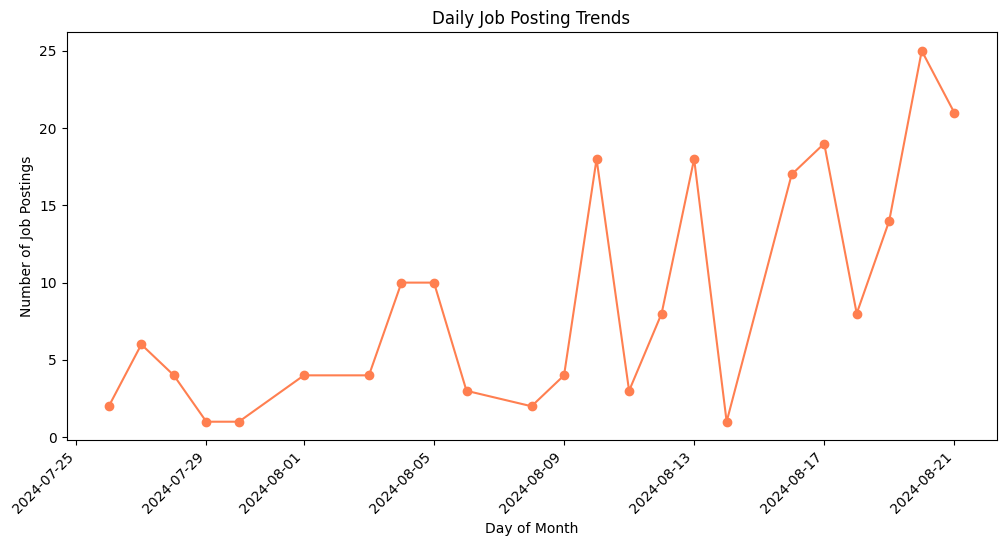

In [13]:
# Filter the DataFrame to exclude rows where 'Date_new' is '2024-07-23'
daily_postings = df[~df['Date_new'].isin(['2024-07-23'])]

# Count the occurrences of each value in the 'Date_new' column and sort by index (date)
daily_postings = daily_postings['Date_new'].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(12, 6))
daily_postings.plot(kind='line', marker='o', color='coral')

# Set labels and title
plt.title('Daily Job Posting Trends')
plt.xlabel('Day of Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)

plt.show()

This graph shows the daily job posting trends over time.

* Overall job posting trend: While there are daily fluctuations, there seems to be a general upward trend over time, with higher peaks towards the end of the period.
* Highest point: The peak of job postings occurs near the end of the period, reaching about 25 postings in a single day.
* Lowest points: There are several days with very few job postings, close to zero, particularly in late July and early August.
* Range: The number of daily job postings ranges from near zero to 25, showing significant variation in hiring activity.
* Cyclical pattern: There seems to be a somewhat cyclical pattern, with peaks occurring every 4-5 days. This could indicate weekly cycles in job posting activity.



**2. Salary Analysis**

2.1 What is the distribution of salary ranges across different job titles?

In [40]:
top_titles = df['Job Title'].value_counts().head(5).index
df_filtered = df[df['Job Title'].isin(top_titles)]

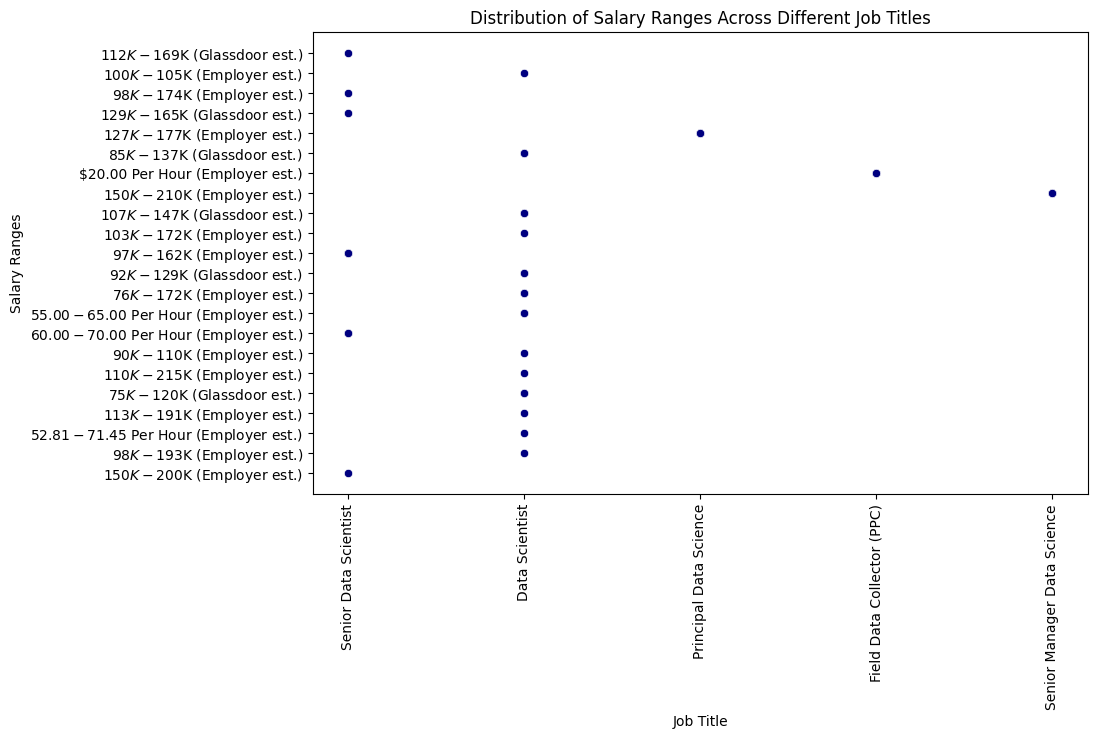

In [44]:
plt.figure(figsize= (10, 6))
sns.scatterplot(data= df_filtered, x= 'Job Title', y= 'Salary', color= 'navy')
plt.xlabel('Job Title')
plt.ylabel('Salary Ranges')
plt.title('Distribution of Salary Ranges Across Different Job Titles')
plt.xticks(rotation=90)
plt.show()

Find the insight from this chart:

* Salary Range Variability: There's a wide range of salaries across and within job titles, from hourly rates to annual salaries, and from around $75K to over  $200K annually.
* Data Scientist Concentration: The "Data Scientist" role has the most data points, suggesting it's the most common job title in the dataset. It also shows the widest variety of salary ranges.
* Senior Positions Pay More: Generally, roles with "Senior" or "Principal" in the title tend to have higher salary ranges, as expected.